In [288]:
%matplotlib inline

import numpy as np
import pandas as pd
import os
import struct
import matplotlib.pyplot as plt

import cv2

import dicom
# import SimpleITK as sitk 

from swat import *

ImportError: No module named 'cv2'

In [287]:
def imageShow(conn, casTable, imageId, nImages):
    a = conn.table.fetch(table=casTable, sastypes=False, sortby=[{'name':'_id_'}], to=nImages)
    fig = plt.figure(figsize=(20, 20))
    for i in range(nImages):
        imageData = a['Fetch'].ix[i][imageId]
        img_np = cv2.imdecode(np.fromstring(imageData, np.uint8), 1)
        fig.add_subplot(1, nImages, i+1)
        plt.imshow(img_np)
        img_np[:,:,[0,2]] = img_np[:,:,[2,0]]
        plt.xticks([]), plt.yticks([])

Load the available patient images: sample_images.7z from https://www.kaggle.com/c/data-science-bowl-2017/data.

In [132]:
IMAGE_PATH = '../sample_images'
# Each folder represents one (3D) patient image or scan.
patients = os.listdir(IMAGE_PATH)
patients.sort()
patients
# Each folder contains n DICOM files, where n is equal to the number of slices for the patient.
len(os.listdir(IMAGE_PATH + '/' + patients[0]))

134

Connect to the CAS server. 
My _authinfo file is located in my home directory: ~/_authinfo and contains as its first line "default user europe\sbxjen password ...".
Also put the sample images on the CAS server.

In [4]:
conn = CAS('rdcgrd104.unx.sas.com', '56884', authinfo='../../_authinfo')
conn.setsessopt(caslib='CASUSER(sbxjen)')

NOTE: 'CASUSER(sbxjen)' is now the active caslib.


<div class="cas-output-area"></div>
<p class="cas-results-performance"><small><span class="cas-elapsed">elapsed 0.0086s</span> &#183; <span class="cas-user">user 0.009s</span> &#183; <span class="cas-memory">mem 0.276MB</span></small></p>

In [5]:
conn.loadactionset(actionset='Image')
conn.loadactionset(actionset='BioMedImage')
conn.loadactionset(actionset='DeepLearn')

NOTE: Added action set 'Image'.


NOTE: Added action set 'BioMedImage'.


NOTE: Added action set 'DeepLearn'.


<div class="cas-results-key"><b>&#167; actionset</b></div>
<div class="cas-results-body">
<div>DeepLearn</div>
</div>
<div class="cas-output-area"></div>
<p class="cas-results-performance"><small><span class="cas-elapsed">elapsed 0.31s</span> &#183; <span class="cas-user">user 0.275s</span> &#183; <span class="cas-sys">sys 0.012s</span> &#183; <span class="cas-memory">mem 0.539MB</span></small></p>

Back to the client. Let's have a look at the images.

In [208]:
def loadScan(path):
    """
    Load a scan, which consists of multiple slices.
    :param      path: path to a patient scan
    :return:    slices: a list of dicom.dataset.FileDataset
    """
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    try:
        st = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        st = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
    for s in slices:
        s.SliceThickness = st
    return slices

In [211]:
slices = loadScan(IMAGE_PATH + '/' + patients[0])
slices[2].ImagePositionPatient

'2.5'

In [14]:
def getImagePixels(path):
    """
    Get scan pixels.
    :param      path: path to a patient scan
    :return:    np.array
    """
    slices = loadScan(path)
    image = np.stack([s.pixel_array for s in slices])
    return image

Every image is layered: a 3D (length x breadth x height) numpy array.

In [293]:
slices = getpixels(IMAGE_PATH + '/' + patients[0])
slice = slices[80]
print(slice.dtype)
df = pd.DataFrame(slice)
df.head()

int16


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000
1,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000
2,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000
3,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000
4,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000


In [160]:
type(loadScan(IMAGE_PATH + '/' + patients[0])[0])

dicom.dataset.FileDataset

Show one of the slices, for comparison below.

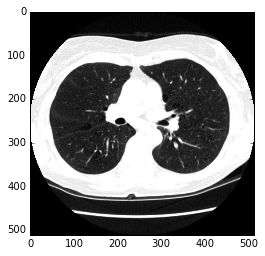

In [146]:
plt.gray()
plt.imshow(slice, vmin=0, vmax=1000)
plt.show()

Show a histogram of pixel values in slice, for comparison later on.

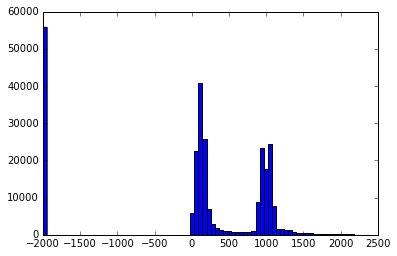

In [148]:
plt.hist(slice.flatten(), bins=80)
plt.show()

Now let's have a look at the images on the CAS server side.

In [207]:
# Just a test to check how standard CAS images should look like.
# conn.image.loadimages(casOut={'caslib':'CASUSER(sbxjen)', 'name':'imagesTable', 'replace':True},
#                      path='/u/etfcan/images/testImages')
conn.image.loadImages(casOut={'caslib':'CASUSER(sbxjen)', 'name':'sample_images', 'replace':True},
                      addColumns={"Width", "Height", "Depth", "channelType", "channelCount", "position", "orientation", "spacing"},
                      decode=True, path='/u/sbxjen/sample_images/00cba091fa4ad62cc3200a657aeb957e')

NOTE: Loaded 134 images from /u/sbxjen/sample_images/00cba091fa4ad62cc3200a657aeb957e into Cloud Analytic Services table sample_images.


<div class="cas-output-area"></div>
<p class="cas-results-performance"><small><span class="cas-elapsed">elapsed 7.85s</span> &#183; <span class="cas-user">user 6.86s</span> &#183; <span class="cas-sys">sys 0.486s</span> &#183; <span class="cas-memory">mem 20.2MB</span></small></p>

Below is a 3D medical image. To be continued ...

In [205]:
conn.image.loadImages(casOut={'caslib':'CASUSER(sbxjen)', 'name':'medical', 'replace':True}, 
                      addColumns={"Width", "Height", "Depth", "channelType", "channelCount", "position", "orientation", "spacing"},
                      decode=True, path='/u/fivada/Playpens/PlayITK/SampleImages/vhfAnkle.nii')

NOTE: Loaded 1 image from /u/fivada/Playpens/PlayITK/SampleImages/vhfAnkle.nii into Cloud Analytic Services table medical.


<div class="cas-output-area"></div>
<p class="cas-results-performance"><small><span class="cas-elapsed">elapsed 0.48s</span> &#183; <span class="cas-user">user 0.188s</span> &#183; <span class="cas-sys">sys 0.283s</span> &#183; <span class="cas-memory">mem 228MB</span></small></p>

In [216]:
fetchedRows = conn.fetch(table={'caslib':'CASUSER(sbxjen)', 'name':'sample_images'}, sastypes=False, to=200)['Fetch'] # sortBy="_position_" has no meaning at this point

In [203]:
fetchedRows["_id_"] # fetchedRows is a subclass of Python’s ordered dictionary.

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: _id_, dtype: int64

In [ ]:
def updateImageWithThickness(slices):
    """
    Update patient image with the thickness of each slice.
    :param      slices: the slices making up one scan in one CAS Table
    :return:    slices, updated with slices["_positionPatient_"] = double(slices["_position_"]) and slices["_thickness_"]
    """
    dim = slices["_dimension_"][0]
    slices["_positionPatient_"] = pd.Series(np.array([struct.unpack('='+str(dim)+'d', pos[0:dim*8])[2] for pos in slices["_position_"]], dtype=np.float64))
    slices = slices.sort_values(by="_positionPatient_")
    slices = slices.reset_index(drop=True)
    st = np.abs(slices["_positionPatient_"].iloc[0] - slices["_positionPatient_"].iloc[1])
    print(st)
    slices["_thickness_"] = pd.Series(st * np.ones_like(slices["_positionPatient_"], dtype=np.int64))
    return slices

In [263]:
def getImageArray(images, dims, res, fmts, n=0):
    """
    Get pixels. 
    :param images: 
    :param dims: 
    :param res: 
    :param fmts: 
    :param n: 
    :return: 
    """
    dim = dims[n]
    res = np.array(struct.unpack('='+str(dim)+'q', res[n][0:dim*8]), dtype=np.int64)
    res = res[::-1]
    fmt = fmts[n]
    nCells = np.prod(res)
    if (fmt==37):    
        image = np.array(struct.unpack('='+str(nCells)+'i', images[n][0:4*nCells]), dtype=np.int32)
        image = np.reshape(image, res)
    elif (fmt==35) or (fmt==33):
        image = np.array(struct.unpack('='+str(nCells)+'h', images[n][0:2*nCells]), dtype=np.int16)
        image = np.reshape(image, res)
    elif (fmt==32):
        image = np.array(bytearray(images[n][0:nCells]), dtype=np.int8)
        image = np.reshape(image, res)
    # else:
    #     image = np.array(bytearray(images[n]))
    #     image = np.reshape(image, (res[0], res[1], 3))
    #     image = reverse(image, 2)
    return image + 1024

In [308]:
slice = getImageArray(fetchedRows["_image_"], fetchedRows["_dimension_"], fetchedRows["_resolution_"], fetchedRows["_imageFormat_"], 80)
df = pd.DataFrame(slice[0]) # slice.shape = [1 512 512]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000
1,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000
2,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000
3,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000
4,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,...,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000


In [309]:
plt.gray()
plt.imshow(slice[0], vmin=0, vmax=1000)
plt.show()

In [291]:
plt.gray()
plt.imshow(slice[0], vmin=0, vmax=1000)
plt.show()

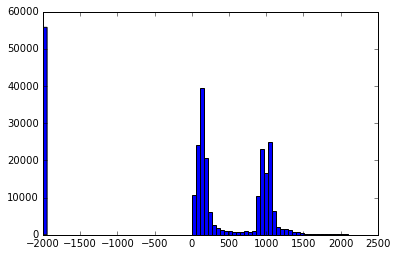

In [271]:
plt.hist(slice[0].flatten(), bins=80)
plt.show()

In [310]:
# sampleImagesTable = conn.CASTable('sample_images')
# imageShow(conn, sampleImagesTable, 0, 1)

NameError: name 'cv2' is not defined

In [ ]:
conn.image.processImages(casout={'caslib':'CASUSER(sbxjen)','name':'processed_images'},
                         imagefunctions=[{'functionoptions':{'functiontype':'GAUSSIAN_FILTER','kernelwidth':3,'kernelheight':3}}],
                         imagetable={'caslib':'CASUSER(sbxjen)','name':'sample_images'})

Back to a 3D example.

In [323]:
fetchedRows = conn.fetch(table={'caslib':'CASUSER(sbxjen)', 'name':'medical'}, sastypes=False, to=200)['Fetch']

In [327]:
fetchedRows["_image_"]

0    b'\x00\xfc\x00\xfc\x00\xfc\x00\xfc\x00\xfc\x00...
Name: _image_, dtype: object

In [ ]:
conn.image.flattenimagetable(casOut={'caslib':'CASUSER(sbxjen)', 'name':'processedImagesTable', 'replace':True}, 
                             imagetable={'caslib':'CASUSER(sbxjen)', 'name':'sample_images'})
out = conn.table.fetch(table={'caslib':'CASUSER(sbxjen)', 'name':'processedImagesTable'}, to=2)
out